# SÁL242F Exercise 1: Introduction to Python for Data Analysis

## Purpose of the exercise

This first programming exercise introduces Python through a real, large-scale dataset. The goal is not advanced statistics, but to learn how to load, inspect, clean, summarize, and visualize data in a reproducible way.

By the end of the exercise, students should be able to:

* work comfortably in a Jupyter notebook
* load and inspect a real dataset using pandas
* perform basic data cleaning and feature construction
* answer simple research questions using groupby and aggregation
* create clear, minimal plots with matplotlib
* describe results in plain language

This exercise must be completed in Python.

## Data Source

The data in `data/openalex_works.csv` is an export from OpenAlex (https://openalex.org), containing records of works (articles) filtered at export time with the following criteria:

- Year: 2000–2025
- Field: Psychology
- Type: article
- Source type: journal
- Countries: Iceland, Sweden, Norway, Denmark, Finland, Greenland, Faroe Islands

About OpenAlex:

OpenAlex is an open, free index of scholarly metadata (works, authors, institutions, journals, and concepts) provided by OurResearch. It aggregates bibliographic and citation metadata from many sources and makes it available via a web UI and an API. OpenAlex data and metadata are published under an open public-domain-like license (see https://openalex.org for current licensing and API details).

This CSV was saved locally as `data/openalex_works.csv` and is used throughout this notebook for analysis and plotting.

In [29]:
# First we add the necessary imports

import pandas as pd
import matplotlib.pyplot as plt

# Add your imports here

In [30]:
# Loading the data
import pandas as pd
fp = '../../data/exercise_1/openalex_works.csv' # Change this to the actual path

df = pd.read_csv(fp, low_memory=False) # This loads the CSV file into a DataFrame
print('Loaded:', df.shape) # Prints the shape of the DataFrame

# Use df.head() to display the first few rows
# ---SOLUTION---
df.head()

Loaded: (66072, 29)


,id,abstract,authorships.author.display_name,authorships.author.id,authorships.author.orcid,authorships.countries,authorships.institutions.display_name,authorships.institutions.id,authorships.is_corresponding,best_oa_location.license,...,open_access.is_oa,open_access.oa_status,primary_location.source.display_name,primary_location.source.id,primary_location.source.issn_l,primary_location.source.type,primary_topic.display_name,publication_date,publication_year,type
0,https://openalex.org/W2120575493,NaN,Ruth Gilbert|Cathy Spatz Widom|Kevin D. Browne...,https://openalex.org/A5005303580|https://opena...,https://orcid.org/0000-0001-9347-2709|https://...,GB|US|GB|NZ|GB|SE,Royal College of Paediatrics and Child Health|...,https://openalex.org/I55571929|https://openale...,False|False|False|False|False|False,NaN,...,False,closed,The Lancet,https://openalex.org/S49861241,0140-6736,journal,Child Abuse and Trauma,2008-12-05,2008,article
1,https://openalex.org/W2161411308,The differences across cultures in the enforce...,Michele J. Gelfand|Jana L. Raver|Lisa H. Nishi...,https://openalex.org/A5070913945|https://opena...,https://orcid.org/0000-0002-9780-9230|https://...,US|CA|US|US|US|SG|US||SG||TR|DE|PL|PT|HK|IN|PE...,"University of Maryland, College Park|Queen's U...",https://openalex.org/I66946132|https://openale...,True|False|False|False|False|False|False|False...,other-oa,...,True,green,Science,https://openalex.org/S3880285,0036-8075,journal,Cultural Differences and Values,2011-05-26,2011,article
2,https://openalex.org/W2342137125,NaN,Edward L. Deci|Anja H. Olafsen|Richard M. Ryan,https://openalex.org/A5004154542|https://opena...,https://orcid.org/0000-0001-8246-8536|https://...,AU|NO|US|NO|AU|US,Australian Catholic University|University of S...,https://openalex.org/I86695891|https://openale...,False|False|False,NaN,...,False,closed,Annual Review of Organizational Psychology and...,https://openalex.org/S4210200923,2327-0608,journal,Motivation and Self-Concept in Sports,2017-01-26,2017,article
3,https://openalex.org/W2037445719,The aim of the present study was to focus on t...,Nadia Garnefski|V. Kraaij|Maya J. Schroevers|G...,https://openalex.org/A5077610649|https://opena...,https://orcid.org/0000-0003-1198-0502||https:/...,NL|NL|NL|DK,Leiden University|Leiden University Medical Ce...,https://openalex.org/I121797337|https://openal...,True|False|False|False,cc-by-nc,...,True,hybrid,Journal of Clinical Psychology in Medical Sett...,https://openalex.org/S66816338,1068-9583,journal,Posttraumatic Stress Disorder Research,2008-12-01,2008,article
4,https://openalex.org/W2060451083,Several previous studies have suggested that b...,Philip H. K. Seymour|Mikko Aro|Jane Erskine,https://openalex.org/A5060417452|https://opena...,|https://orcid.org/0000-0002-0545-0591|,GB|FI|FI|GB,University of Dundee|University of Jyväskylä|U...,https://openalex.org/I177639307|https://openal...,False|False|False,NaN,...,True,bronze,British Journal of Psychology,https://openalex.org/S179213746,0007-1269,journal,Reading and Literacy Development,2003-05-01,2003,article


## Exploring the data

Now we start exploring the data.

In [31]:
# Print the column names of the DataFrame
# ---SOLUTION---
print('Columns:', df.columns.tolist())

Columns: ['id', 'abstract', 'authorships.author.display_name', 'authorships.author.id', 'authorships.author.orcid', 'authorships.countries', 'authorships.institutions.display_name', 'authorships.institutions.id', 'authorships.is_corresponding', 'best_oa_location.license', 'cited_by_count', 'corresponding_institution_ids', 'display_name', 'doi', 'funders.display_name', 'fwci', 'ids.pmid', 'is_retracted', 'language', 'open_access.is_oa', 'open_access.oa_status', 'primary_location.source.display_name', 'primary_location.source.id', 'primary_location.source.issn_l', 'primary_location.source.type', 'primary_topic.display_name', 'publication_date', 'publication_year', 'type']


In [32]:
# Print the values of each column for the first row in the DataFrame
# ---SOLUTION---
print('First row values:')
for col in df.columns:
    print(f"{col}: {df.at[0, col]}")

First row values:
id: https://openalex.org/W2120575493
abstract: nan
authorships.author.display_name: Ruth Gilbert|Cathy Spatz Widom|Kevin D. Browne|David M. Fergusson|Elspeth Webb|Staffan Janson
authorships.author.id: https://openalex.org/A5005303580|https://openalex.org/A5043462216|https://openalex.org/A5036156431|https://openalex.org/A5087065647|https://openalex.org/A5112156949|https://openalex.org/A5030920844
authorships.author.orcid: https://orcid.org/0000-0001-9347-2709|https://orcid.org/0000-0001-7006-4905|https://orcid.org/0000-0002-5604-3021|https://orcid.org/0000-0002-8117-017X||https://orcid.org/0000-0002-2542-6791
authorships.countries: GB|US|GB|NZ|GB|SE
authorships.institutions.display_name: Royal College of Paediatrics and Child Health|University College London|City University of New York|John Jay College of Criminal Justice|University of Birmingham|University of Nottingham|Christchurch Clinical Studies Trust|Cardiff University|Karlstad University
authorships.institutions

In [33]:
# Find a few rows where the 'abstract' is available and print their abstracts. How many such rows are there?
# ---SOLUTION---
abstract_rows = df[df['abstract'].notnull()]
print('Abstracts of the first few rows with an abstract:')
for i, row in abstract_rows.head().iterrows():
    print(f"Abstract {i}:")
    print(row['abstract'])
    print()

print('Total number of rows with an abstract:', df['abstract'].notnull().sum())

Abstracts of the first few rows with an abstract:
Abstract 1:
The differences across cultures in the enforcement of conformity may reflect their specific histories.

Abstract 3:
The aim of the present study was to focus on the relative contributions of personality, psychological health and cognitive coping to post-traumatic growth in patients with recent myocardial infarction (MI). The sample consisted of 139 patients who had experienced a first-time acute MI between 3 and 12 months before data assessment. Multivariate relationships were tested by means of Structural Equation Modeling. The results showed that besides the contribution of personality and psychological health, a significant amount of variance in growth was explained by the cognitive coping strategies people used to handle their MI. As cognitive coping strategies are generally assumed to be mechanisms that are subject to potential influence and change, this provides us with important targets for intervention.

Abstract 4:


In [34]:
# Which of the abstracts contain the word "sleep"?
# How many did you find? Print some examples.
# ---SOLUTION---
import re
pattern = re.compile(r'sleep', re.IGNORECASE)
abs_with_terms = []
for i, row in abstract_rows.iterrows():
    if pattern.search(row['abstract']):
        abs_with_terms.append((i, row['abstract']))

# Print 5 examples of the abstracts that contain the terms
print(f'Number of abstracts containing "sleep": {len(abs_with_terms)}')
print('Abstracts containing "sleep":')
for i, abstract in abs_with_terms[:5]:
    print(f"Abstract {i}:")
    print(abstract)
    print()

Number of abstracts containing "sleep": 1383
Abstracts containing "sleep":
Abstract 10:
Summary This European guideline for the diagnosis and treatment of insomnia was developed by a task force of the European Sleep Research Society, with the aim of providing clinical recommendations for the management of adult patients with insomnia. The guideline is based on a systematic review of relevant meta‐analyses published till June 2016. The target audience for this guideline includes all clinicians involved in the management of insomnia, and the target patient population includes adults with chronic insomnia disorder. The GRADE (Grading of Recommendations Assessment, Development and Evaluation) system was used to grade the evidence and guide recommendations. The diagnostic procedure for insomnia, and its co‐morbidities, should include a clinical interview consisting of a sleep history (sleep habits, sleep environment, work schedules, circadian factors), the use of sleep questionnaires and sl

In [35]:
# Which of the abstracts contain the word "child"?
# How many did you find? Print some examples.
# ---SOLUTION---
import re
pattern = re.compile(r'child', re.IGNORECASE)
abs_with_terms = []
for i, row in abstract_rows.iterrows():
    if pattern.search(row['abstract']):
        abs_with_terms.append((i, row['abstract']))

# Print 5 examples of the abstracts that contain the terms
print(f'Number of abstracts containing "child": {len(abs_with_terms)}')
print('Abstracts containing "child":')
for i, abstract in abs_with_terms[:5]:
    print(f"Abstract {i}:")
    print(abstract)
    print()

Number of abstracts containing "child": 5247
Abstracts containing "child":
Abstract 4:
Several previous studies have suggested that basic decoding skills may develop less effectively in English than in some other European orthographies. The origins of this effect in the early (foundation) phase of reading acquisition are investigated through assessments of letter knowledge, familiar word reading, and simple nonword reading in English and 12 other orthographies. The results confirm that children from a majority of European countries become accurate and fluent in foundation level reading before the end of the first school year. There are some exceptions, notably in French, Portuguese, Danish, and, particularly, in English. The effects appear not to be attributable to differences in age of starting or letter knowledge. It is argued that fundamental linguistic differences in syllabic complexity and orthographic depth are responsible. Syllabic complexity selectively affects decoding, wherea

In [36]:
# Which of the abstracts contain the word "replicate" or "reproduce"?
# How many did you find? Print some examples.
# ---SOLUTION---
import re
pattern = re.compile(r'replicate|reproduce', re.IGNORECASE)
abs_with_terms = []
for i, row in abstract_rows.iterrows():
    if pattern.search(row['abstract']):
        abs_with_terms.append((i, row['abstract']))

# Print 5 examples of the abstracts that contain the terms
print(f'Number of abstracts containing "replicate" or "reproduce": {len(abs_with_terms)}')
print('Abstracts containing "replicate" or "reproduce":')
for i, abstract in abs_with_terms[:5]:
    print(f"Abstract {i}:")
    print(abstract)
    print()

Number of abstracts containing "replicate" or "reproduce": 429
Abstracts containing "replicate" or "reproduce":
Abstract 91:
Replication—an important, uncommon, and misunderstood practice—is gaining appreciation in psychology. Achieving replicability is important for making research progress. If findings are not replicable, then prediction and theory development are stifled. If findings are replicable, then interrogation of their meaning and validity can advance knowledge. Assessing replicability can be productive for generating and testing hypotheses by actively confronting current understandings to identify weaknesses and spur innovation. For psychology, the 2010s might be characterized as a decade of active confrontation. Systematic and multi-site replication projects assessed current understandings and observed surprising failures to replicate many published findings. Replication efforts highlighted sociocultural challenges such as disincentives to conduct replications and a tenden

In [37]:
# Print the number of publications per year

# ---SOLUTION---
print('\nPublication year counts:')
display(df['publication_year'].value_counts().sort_index())


Publication year counts:


publication_year
2000     706
2001     734
2002     832
2003     931
2004     961
2005     998
2006    1193
2007    1192
2008    1420
2009    1585
2010    1776
2011    1933
2012    2355
2013    2571
2014    2634
2015    2988
2016    3245
2017    3533
2018    3627
2019    3742
2020    4268
2021    4922
2022    4847
2023    4749
2024    4583
2025    3747
Name: count, dtype: int64

In [38]:
# Print top 20 journals by number of publications

# ---SOLUTION---
print('\nTop journals:')
display(df['primary_location.source.display_name'].value_counts().head(20))




Top journals:


primary_location.source.display_name
Frontiers in Psychology                                              1101
PLoS ONE                                                              771
European Journal of Public Health                                     673
Nordic Journal of Psychiatry                                          644
European Psychiatry                                                   572
Scandinavian Journal of Psychology                                    486
BMC Psychiatry                                                        476
International Journal of Environmental Research and Public Health     456
Journal of Affective Disorders                                        389
BMC Public Health                                                     358
Frontiers in Psychiatry                                               327
Personality and Individual Differences                                321
BMJ Open                                                              315
T

In [39]:
# How many publications are open access?
# Hint: use the 'open_access.oa_status' column

# ---SOLUTION---

print('\nOA status counts:')
display(df['open_access.oa_status'].value_counts(dropna=False))


OA status counts:


open_access.oa_status
closed     27753
gold       11944
hybrid     10280
diamond     6688
bronze      5216
green       4191
Name: count, dtype: int64

## Do your own exploring

Analyze the data further to answer some simple questions. Add code cells as needed.

As inspiration, here is an example question and solution: **How many publications do the nordic countries have per year, per capita?**

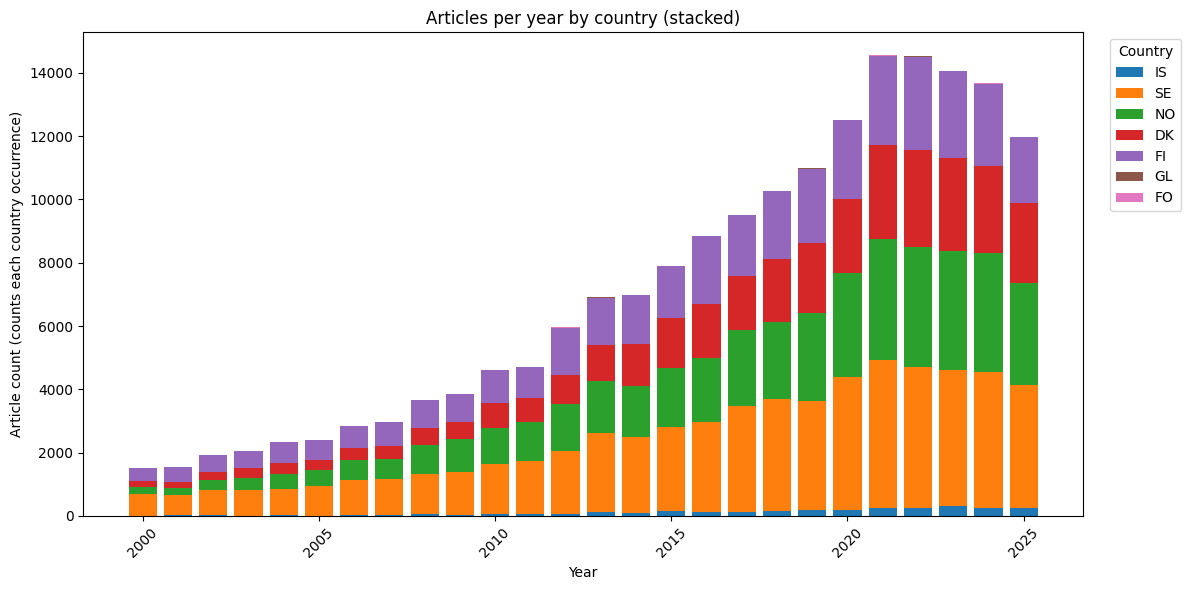

In [ ]:
# Countries of interest (ISO codes)
countries = ['IS','SE','NO','DK','FI','GL','FO']

# Prepare country-year counts
df_c = df[['publication_year','authorships.countries']].dropna()
df_c = df_c.assign(countries=df_c['authorships.countries'].astype(str).str.split('|'))
df_c = df_c.explode('countries')
df_c['countries'] = df_c['countries'].str.strip()

df_c = df_c[df_c['publication_year'].notna()]
df_c['publication_year'] = df_c['publication_year'].astype(int)

pivot = df_c.groupby(['publication_year','countries']).size().unstack(fill_value=0)
# Keep only the selected countries (add missing as zeros)
pivot = pivot.reindex(columns=countries, fill_value=0)
pivot = pivot.sort_index()

# Plot stacked bar
fig, ax = plt.subplots(figsize=(12,6))
bottom = None
colors = plt.cm.tab10.colors
for i,c in enumerate(countries):
    vals = pivot[c].values
    if bottom is None:
        ax.bar(pivot.index, vals, label=c, color=colors[i % len(colors)])
        bottom = vals
    else:
        ax.bar(pivot.index, vals, bottom=bottom, label=c, color=colors[i % len(colors)])
        bottom = bottom + vals

ax.set_xlabel('Year')
ax.set_ylabel('Article count (counts each country occurrence)')
ax.set_title('Articles per year by country (stacked)')
ax.legend(title='Country', bbox_to_anchor=(1.02,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Iceland country-occurrences in dataset (normalized as IS): 3020
Sample Iceland counts by year (last 5 years):
publication_year
2021    268
2022    256
2023    300
2024    251
2025    249

Iceland per-100k article rates (last 5 years):
publication_year
2021    71.942446
2022    67.015181
2023    77.788121
2024    64.940777
2025    64.423321


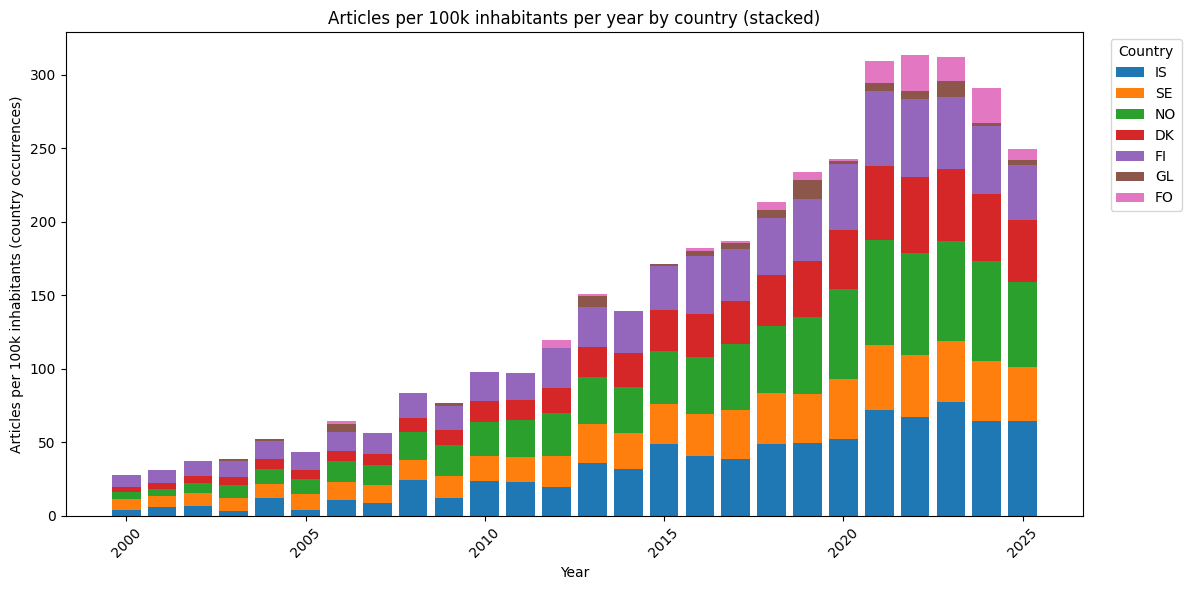

In [43]:
# Now we do per-capita normalization

# Fetch population from World Bank where available; fallback for Greenland/Faroe
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Map ISO2 to World Bank ISO3 where available
wb_map = {
    'IS': 'ISL',
    'SE': 'SWE',
    'NO': 'NOR',
    'DK': 'DNK',
    'FI': 'FIN',
    'GL': None,  # Greenland not in WB as independent country
    'FO': None,  # Faroe Islands not in WB as independent country
}

years = list(range(2000, 2026))
pop_df = pd.DataFrame(index=years)

for iso2, iso3 in wb_map.items():
    if iso3:
        url = f'https://api.worldbank.org/v2/country/{iso3}/indicator/SP.POP.TOTL?format=json&date=2000:2025&per_page=1000'
        try:
            r = requests.get(url, timeout=10)
            data = r.json()
            records = data[1]
            vals = {int(rec['date']): rec['value'] for rec in records if rec.get('value') is not None}
            pop_series = pd.Series(vals)
            pop_df[iso2] = pop_series.reindex(years)
        except Exception:
            pop_df[iso2] = np.nan
    else:
        pop_df[iso2] = np.nan

# Fallback estimates for Greenland and Faroe Islands
fallback = {'GL': 56000, 'FO': 54000}
for iso2 in ['GL','FO']:
    if pop_df[iso2].isna().all():
        pop_df[iso2] = pd.Series({y: fallback[iso2] for y in years})

pop_df = pop_df.sort_index().ffill().bfill()

# Rebuild exploded country column and normalize labels
df_c = df[['publication_year','authorships.countries']].dropna().assign(countries=lambda x: x['authorships.countries'].astype(str).str.split('|')).explode('countries')
df_c['countries'] = df_c['countries'].str.strip()

# Normalization function: map various Iceland labels to 'IS', keep 2-letter codes uppercase
import re

def normalize_label(s):
    s0 = str(s).strip()
    if not s0:
        return s0
    su = s0.upper()
    # common full-name matches for Iceland
    if re.search(r'ICE|ICELAND|ÍSLAND', su):
        return 'IS'
    # map ISO-like values of length 2 (e.g., SE, NO)
    if len(su) == 2 and su.isalpha():
        return su
    # map some ISO3 to ISO2 if present
    iso3_to_iso2 = {'ISL':'IS'}
    if su in iso3_to_iso2:
        return iso3_to_iso2[su]
    # default: return uppercase short token (first token)
    token = su.split()[0]
    return token

# Apply normalization
df_c['country_code'] = df_c['countries'].apply(normalize_label)

# Aggregate counts by normalized code
pivot = df_c.groupby(['publication_year','country_code']).size().unstack(fill_value=0)

# Countries of interest (final codes)
countries = ['IS','SE','NO','DK','FI','GL','FO']
pc = pivot.reindex(columns=countries, fill_value=0).sort_index()

# Verify Iceland presence
is_count = pc['IS'].sum() if 'IS' in pc.columns else 0
print('Total Iceland country-occurrences in dataset (normalized as IS):', int(is_count))
print('Sample Iceland counts by year (last 5 years):')
print(pc['IS'].tail(5).to_string() if 'IS' in pc.columns else 'IS not present')

# Build per-capita rates per 100k inhabitants
rate = pd.DataFrame(index=pc.index)
for c in countries:
    pop_for_years = pop_df.get(c)
    if pop_for_years is None:
        pop_for_years = pd.Series({y: fallback.get(c, np.nan) for y in years})
    pop_for_years = pop_for_years.reindex(pc.index).astype(float)
    rate[c] = pc[c] / (pop_for_years / 100000)

rate = rate.replace([np.inf, -np.inf], np.nan).fillna(0)

# Verify per-100k for Iceland (recent years)
print('\nIceland per-100k article rates (last 5 years):')
if 'IS' in rate.columns:
    print(rate['IS'].tail(5).to_string())
else:
    print('IS column missing in rate dataframe')

# Plot stacked bar of per-100k rates
fig, ax = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(rate))
colors = plt.cm.tab10.colors
for i,c in enumerate(countries):
    vals = rate[c].values
    ax.bar(rate.index, vals, bottom=bottom, label=c, color=colors[i % len(colors)])
    bottom = bottom + vals

ax.set_xlabel('Year')
ax.set_ylabel('Articles per 100k inhabitants (country occurrences)')
ax.set_title('Articles per 100k inhabitants per year by country (stacked)')
ax.legend(title='Country', bbox_to_anchor=(1.02,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Now do your own exploring

# ---SOLUTION---